# Train-Test Split

Provides a way to split a given CSV to train and test datasets. Creates train and test datasets based on the input CSV file.

In [13]:
# file location of the dataset
dataset_loc = '..//Datasets/Resized_data_50_50'
filename = 'labels.csv'

# splitting ratio
split_ratio = 0.10

# random state
random_state = 1234

## Imports

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

from matplotlib import image, pyplot

import cv2

## Loading the Dataset

In [15]:
df = pd.read_csv(os.path.join(dataset_loc, filename))

df.columns

Index(['Image_Path', 'Parasitized'], dtype='object')

## Looking at class distribution

<AxesSubplot:>

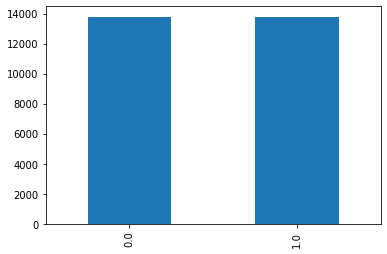

In [16]:
df['Parasitized'].value_counts().plot(kind = 'bar')

The data is equally distributed!

In [17]:
train, test = train_test_split(df, test_size = split_ratio, stratify = df.Parasitized, random_state = random_state)

In [18]:
train_df = pd.DataFrame(train)
train_df.reset_index(drop = True, inplace = True)
train_df.head()

,Image_Path,Parasitized
0,..\Datasets\Resized_data_50_50\Parasitized\50x...,1.0
1,..\Datasets\Resized_data_50_50\Parasitized\50x...,1.0
2,..\Datasets\Resized_data_50_50\Uninfected\50x5...,0.0
3,..\Datasets\Resized_data_50_50\Parasitized\50x...,1.0
4,..\Datasets\Resized_data_50_50\Parasitized\50x...,1.0


In [19]:
test_df = pd.DataFrame(test)
test_df.reset_index(drop = True, inplace = True)
test_df.head()

,Image_Path,Parasitized
0,..\Datasets\Resized_data_50_50\Parasitized\50x...,1.0
1,..\Datasets\Resized_data_50_50\Uninfected\50x5...,0.0
2,..\Datasets\Resized_data_50_50\Parasitized\50x...,1.0
3,..\Datasets\Resized_data_50_50\Parasitized\50x...,1.0
4,..\Datasets\Resized_data_50_50\Parasitized\50x...,1.0


## Checking distribution of split datasets

### Train DF

<AxesSubplot:>

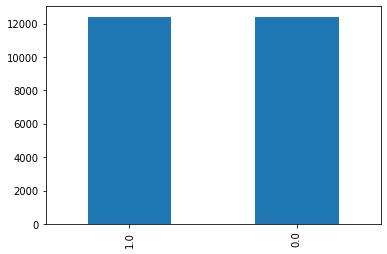

In [20]:
train_df['Parasitized'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

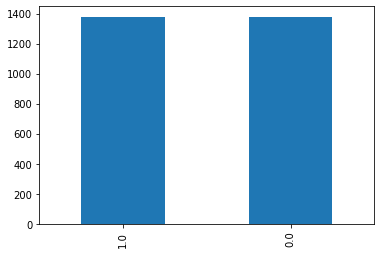

In [21]:
test_df['Parasitized'].value_counts().plot(kind = 'bar')

We see that we have similar number of samples! The split preserves the original ratio.

## Saving the train and test data to CSV files

In [22]:
train_df.to_csv(os.path.join(dataset_loc, 'train.csv'), index = False)
test_df.to_csv(os.path.join(dataset_loc, 'test.csv'), index = False)